<a href="https://colab.research.google.com/github/tassandro/bitcoin_dolar/blob/main/dolar_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance ccxt pandas numpy matplotlib seaborn scipy statsmodels prophet scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.6/288.6 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.12
    Uninstalling aiohttp-3.11.12:
      Successfully uninstalled aiohttp-3.11.12


In [ ]:

import yfinance as yf
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [60]:
# Coletando dados históricos do dólar (BRL/USD)
dolar = yf.download('BRL=X', start='2023-01-01', end='2025-01-31')['Close']

def fetch_btc_data():
    # Inicializa a exchange KuCoin
    exchange = ccxt.kucoin()

    # Busca os dados OHLCV para BTC/BRL
    btc_ohlcv = exchange.fetch_ohlcv('BTC/BRL', timeframe='1d', since=exchange.parse8601('2023-01-01T00:00:00Z'))

    # Converte os dados em um DataFrame do Pandas
    btc_df = pd.DataFrame(btc_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    # Converte o timestamp para um formato legível
    btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'], unit='ms')

    # Define o timestamp como índice do DataFrame
    btc_df.set_index('timestamp', inplace=True)

    # Retorna a coluna 'close' (preço de fechamento)
    return btc_df['close']

# Exemplo de uso
btc_prices = fetch_btc_data()


# Combina os DataFrames lado a lado
df = pd.concat([dolar, btc_prices], axis=1)

# Remove linhas com valores ausentes (caso algum dia não tenha dados para ambos)
df.dropna(inplace=True)

df.columns = ['Dolar', 'Bitcoin']

## Aqui optamos por aplicar uma transformação logarítmica ou de escala nos preços do Bitcoin para reduzir o impacto da diferença de valores e facilitar a modelagem
df['Bitcoin'] = np.log(df['Bitcoin'])
df


[*********************100%***********************]  1 of 1 completed


,Dolar,Bitcoin
2023-01-02,5.285500,11.386951
2023-01-03,5.360131,11.407412
2023-01-04,5.478500,11.420569
2023-01-05,5.430100,11.407854
2023-01-06,5.349800,11.391770
...,...,...
2025-01-24,5.924000,13.340301
2025-01-27,5.909100,13.305221
2025-01-28,5.892600,13.290660
2025-01-29,5.856100,13.306556


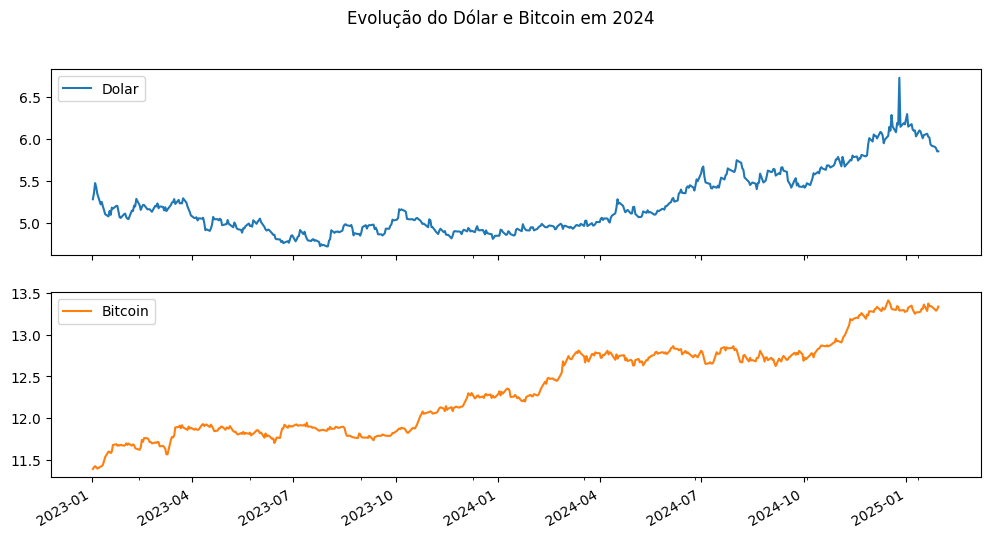

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppih427m7/kf7k_1jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppih427m7/niz0ko8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46775', 'data', 'file=/tmp/tmppih427m7/kf7k_1jy.json', 'init=/tmp/tmppih427m7/niz0ko8r.json', 'output', 'file=/tmp/tmppih427m7/prophet_modelft52jsfk/prophet_model-20250215024149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:41:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Correlação de Pearson: 0.75
Correlação de Spearman: 0.60


02:41:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppih427m7/0dalvfv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppih427m7/gbwo3jrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92129', 'data', 'file=/tmp/tmppih427m7/0dalvfv5.json', 'init=/tmp/tmppih427m7/gbwo3jrh.json', 'output', 'file=/tmp/tmppih427m7/prophet_modeljmne2md7/prophet_model-20250215024150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:41:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:41:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Melhores meses para compra de dólar e Bitcoin ao mesmo tempo em 2025: Maio.
Melhores meses para venda de dólar e Bitcoin ao mesmo tempo em 2025: Janeiro, Novembro, Dezembro.


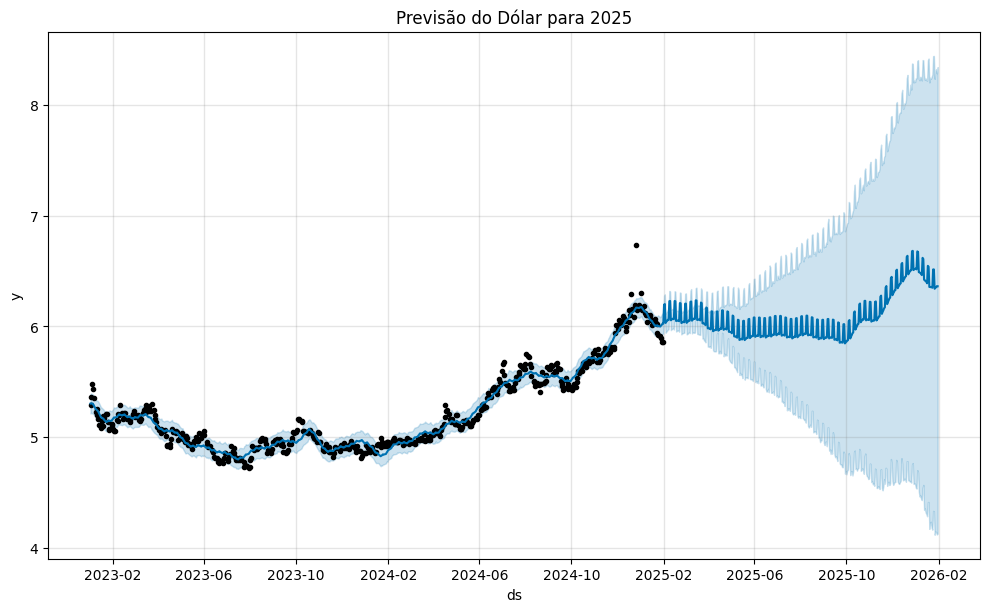

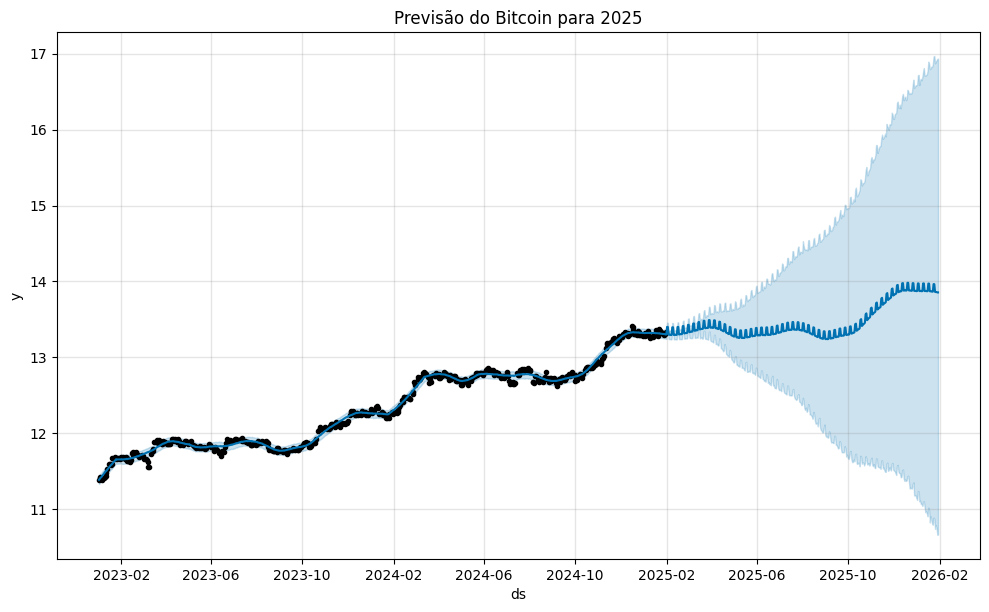

Erro Quadrático Médio (MSE) para o Dólar: 0.00
Erro Quadrático Médio (MSE) para o Bitcoin: 0.00


In [62]:
# Análise exploratória
df.plot(subplots=True, figsize=(12, 6), title="Evolução do Dólar e Bitcoin em 2024")
plt.show()

# Cálculo de correlação
corr_pearson, _ = pearsonr(df['Dolar'], df['Bitcoin'])
corr_spearman, _ = spearmanr(df['Dolar'], df['Bitcoin'])
print(f'Correlação de Pearson: {corr_pearson:.2f}')
print(f'Correlação de Spearman: {corr_spearman:.2f}')

# Modelagem preditiva para 2025 (utilizando Prophet)
df_prophet = df.reset_index().rename(columns={'index': 'ds', 'Dolar': 'y'})
model_dolar = Prophet()
model_dolar.fit(df_prophet)
future_dolar = model_dolar.make_future_dataframe(periods=365)
forecast_dolar = model_dolar.predict(future_dolar)

# Fazendo o mesmo para Bitcoin
df_prophet_btc = df.reset_index().rename(columns={'index': 'ds', 'Bitcoin': 'y'})
model_btc = Prophet()
model_btc.fit(df_prophet_btc)
future_btc = model_btc.make_future_dataframe(periods=365)
forecast_btc = model_btc.predict(future_btc)

# Encontrando os melhores meses para compra
forecast_dolar['month'] = forecast_dolar['ds'].dt.month
forecast_btc['month'] = forecast_btc['ds'].dt.month

# Encontrando os meses com menor média de preços
best_months_dolar = forecast_dolar.groupby('month')['yhat'].mean().nsmallest(3).index.tolist()
best_months_btc = forecast_btc.groupby('month')['yhat'].mean().nsmallest(3).index.tolist()

# Encontrando os meses em comum
best_months = list(set(best_months_dolar) & set(best_months_btc))

# Encontrando os meses com maior média de preços
worst_months_dolar = forecast_dolar.groupby('month')['yhat'].mean().nlargest(3).index.tolist()
worst_months_btc = forecast_btc.groupby('month')['yhat'].mean().nlargest(3).index.tolist()

# Encontrando os meses em comum para venda
worst_months = list(set(worst_months_dolar) & set(worst_months_btc))

month_names = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}

# Convertendo os números dos meses para nomes
worst_months_names = ", ".join([month_names[m] for m in worst_months]) + "."
best_months_names = ", ".join([month_names[m] for m in best_months]) + "."

# Exibindo os resultados
print(f"Melhores meses para compra de dólar e Bitcoin ao mesmo tempo em 2025: {best_months_names}")
print(f"Melhores meses para venda de dólar e Bitcoin ao mesmo tempo em 2025: {worst_months_names}")


# Visualizando previsão do dólar
model_dolar.plot(forecast_dolar)
plt.title("Previsão do Dólar para 2025")
plt.show()

# Visualizando previsão do Bitcoin
model_btc.plot(forecast_btc)
plt.title("Previsão do Bitcoin para 2025")
plt.show()

# Adicionando o cálculo do MSE para o Dólar
mse_dolar = mean_squared_error(df_prophet['y'], forecast_dolar[:len(df_prophet)]['yhat'])
print(f'Erro Quadrático Médio (MSE) para o Dólar: {mse_dolar:.2f}')

# Adicionando o cálculo do MSE para o Bitcoin
mse_btc = mean_squared_error(df_prophet_btc['y'], forecast_btc[:len(df_prophet_btc)]['yhat'])
print(f'Erro Quadrático Médio (MSE) para o Bitcoin: {mse_btc:.2f}')